In [2]:
import numpy as np
from matplotlib import pyplot as plt

Coeff =  [[2.02609563]]
R2 =  0.5903526506667196


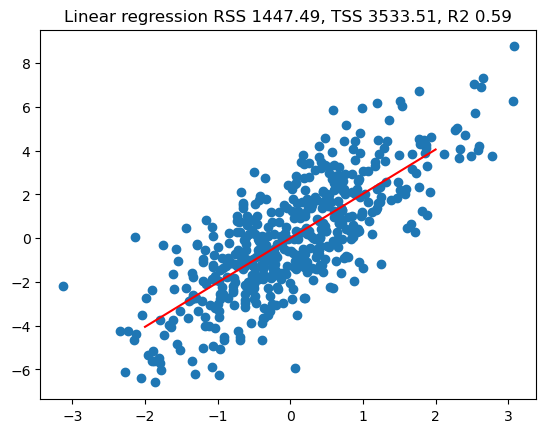

In [33]:
nsamples = 500
ndim = 2
intrinsic_noise = .1
correlation = 0.5 # same shape as ndim
s1, s2 = (1, 1)
cov = [[s1**2, s1*s2*correlation], [s1*s2*correlation, s2**2]]
coefficients = np.arange(1, ndim+1).reshape(ndim, 1)
X_true = np.random.multivariate_normal(np.zeros(ndim), cov, size=nsamples)
y = X_true @ coefficients  + np.random.normal(size=(nsamples, 1), scale=intrinsic_noise)

X = X_true[:, :1]
beta = np.linalg.inv(X.T @ X) @ X.T @ y
TSS = np.sum((y - np.mean(y))**2)
RSS = np.sum((y - X @ beta)**2)
R2 = 1 - RSS/TSS
print('Coeff = ', beta)
print('R2 = ', R2)
xplot = np.linspace(-2, 2, 100).reshape(100, 1)
yplot = xplot @ beta[0]
plt.scatter(X[:, 0], y)
plt.plot(xplot, yplot, 'r')
plt.title(r'Linear regression RSS {:.2f}, TSS {:.2f}, R2 {:.2f}'.format(RSS, TSS, R2))
plt.show()
# plt.scatter(X_true[:, 0], X_true[:, 1])
# plt.title('True data')
# plt.show()
